In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential

import pathlib

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
data_dir = "gdrive/My Drive/animal_images"

In [4]:
batch_size = 32
img_height = 180
img_width = 180

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)

class_names = train_dataset.class_names
print(class_names)

Found 2434 files belonging to 3 classes.
Using 1948 files for training.
Found 2434 files belonging to 3 classes.
Using 486 files for validation.
['bear', 'horse', 'zebra']


(32, 180, 180, 3)
(32,)


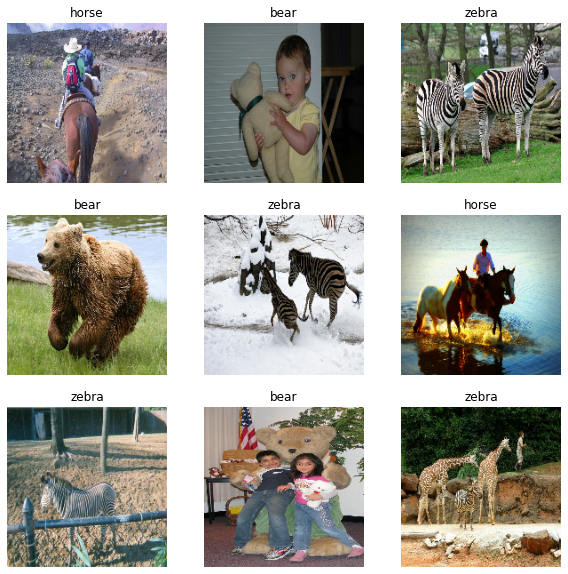

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

for image_batch, labels_batch in train_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

In [7]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
  
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_dataset))
first_image = image_batch[0]

# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.99695086


In [8]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [9]:
epochs = 10

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs)

Epoch 1/10
61/61 [==============================] - 81s 1s/step - loss: 1.0460 - accuracy: 0.4877 - val_loss: 0.8502 - val_accuracy: 0.6379
Epoch 2/10
61/61 [==============================] - 3s 57ms/step - loss: 0.8274 - accuracy: 0.6263 - val_loss: 0.8167 - val_accuracy: 0.6461
Epoch 3/10
61/61 [==============================] - 3s 58ms/step - loss: 0.7108 - accuracy: 0.6879 - val_loss: 0.7397 - val_accuracy: 0.6914
Epoch 4/10
61/61 [==============================] - 3s 57ms/step - loss: 0.6302 - accuracy: 0.7423 - val_loss: 0.7675 - val_accuracy: 0.6770
Epoch 5/10
61/61 [==============================] - 3s 57ms/step - loss: 0.5521 - accuracy: 0.7731 - val_loss: 0.7781 - val_accuracy: 0.6872
Epoch 6/10
61/61 [==============================] - 3s 58ms/step - loss: 0.4031 - accuracy: 0.8445 - val_loss: 0.9749 - val_accuracy: 0.6440
Epoch 7/10
61/61 [==============================] - 3s 57ms/step - loss: 0.2696 - accuracy: 0.8999 - val_loss: 1.0212 - val_accuracy: 0.6667
Epoch 8/10
61/

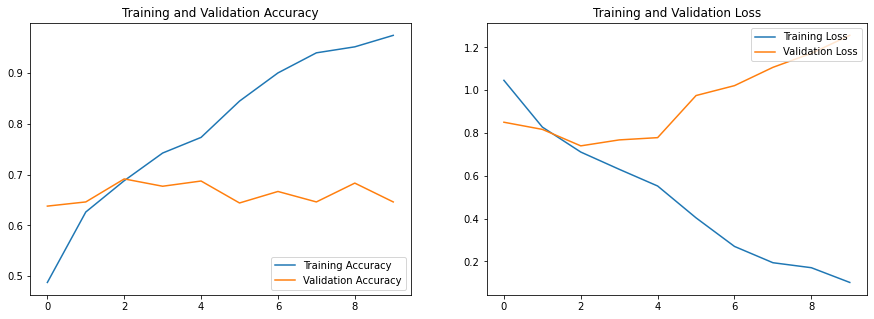

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

(32, 180, 180, 3)
(32,)


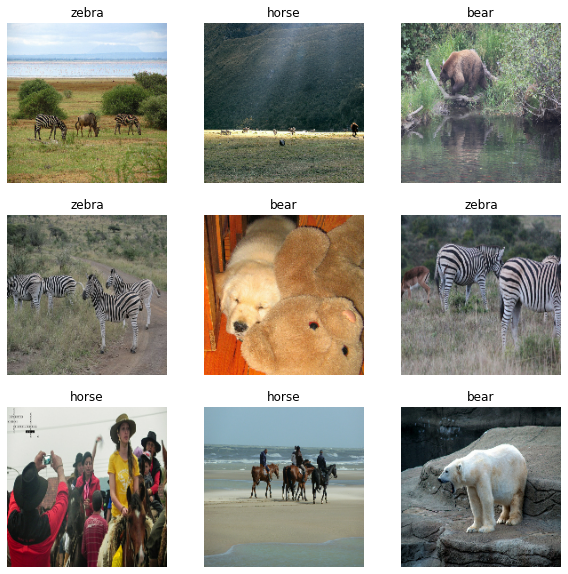

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax=plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
for image_batch,labels_batch in train_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

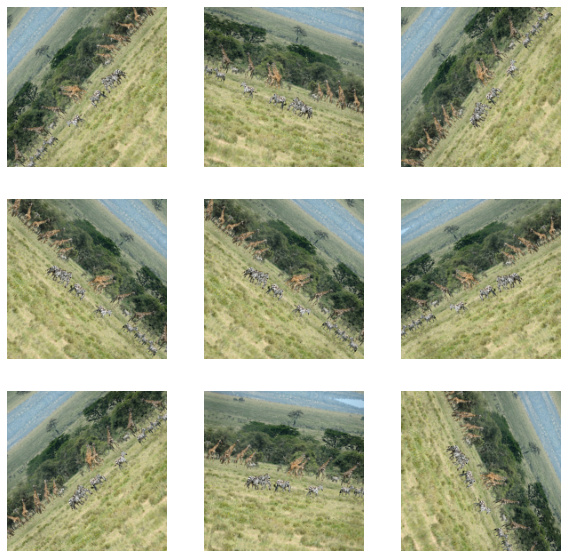

In [12]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),])

for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [13]:
IMG_SIZE = (180, 180)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape = IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')


image_batch,label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

9406464/9406464 [==============================] - 0s 0us/step
(32, 6, 6, 1280)


In [14]:
base_model.trainable = False
base_model.summary()


global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = tf.keras.layers.Dense(3)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 90, 90, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 90, 90, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 90, 90, 32)   0           ['bn_Conv1[0][

In [15]:
inputs = tf.keras.Input(shape = (180, 180, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x = base_model(x, training = False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

len(model.trainable_variables)

initial_epochs = 10

loss0, accuracy0 = model.evaluate(val_dataset)

print('initial loss: {:.2f}'.format(loss0))
print('initial accuracy: {:.2f}'.format(accuracy0))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 180, 180, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                             

In [16]:
history = model.fit(
    train_dataset,
    epochs = initial_epochs,
    validation_data = val_ds)

Epoch 1/10
61/61 [==============================] - 8s 80ms/step - loss: 0.6685 - accuracy: 0.7397 - val_loss: 0.3188 - val_accuracy: 0.8850
Epoch 2/10
61/61 [==============================] - 5s 74ms/step - loss: 0.4520 - accuracy: 0.8326 - val_loss: 0.3338 - val_accuracy: 0.8742
Epoch 3/10
61/61 [==============================] - 4s 74ms/step - loss: 0.4104 - accuracy: 0.8501 - val_loss: 0.2745 - val_accuracy: 0.8958
Epoch 4/10
61/61 [==============================] - 4s 73ms/step - loss: 0.3646 - accuracy: 0.8604 - val_loss: 0.2569 - val_accuracy: 0.9035
Epoch 5/10
61/61 [==============================] - 5s 74ms/step - loss: 0.3666 - accuracy: 0.8573 - val_loss: 0.2642 - val_accuracy: 0.8994
Epoch 6/10
61/61 [==============================] - 4s 73ms/step - loss: 0.3739 - accuracy: 0.8629 - val_loss: 0.2489 - val_accuracy: 0.9030
Epoch 7/10
61/61 [==============================] - 4s 74ms/step - loss: 0.3639 - accuracy: 0.8727 - val_loss: 0.2389 - val_accuracy: 0.9061
Epoch 8/10
61

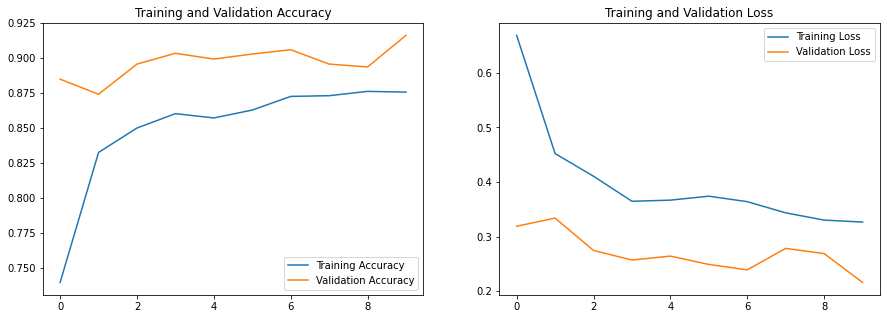

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
base_model.trainable = True
base_model.summary()

#lets take a look to see how many layers are inthe base model
print('Number of layers in the base model: ', len(base_model.layers))

#Fine-tune from this layer onwards
fine_tune_at = 100

#Freeze all layers before 'fine_tune_at' layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable=False

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 90, 90, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 90, 90, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 90, 90, 32)   0           ['bn_Conv1[0][

In [19]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 180, 180, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                             

In [20]:
initial_epochs = 10
fine_tune_epochs=10
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(
    train_dataset,
    epochs = total_epochs,
    initial_epoch = history.epoch[-1],
    validation_data=val_dataset)

Epoch 10/20
61/61 [==============================] - 12s 115ms/step - loss: 0.3369 - accuracy: 0.8758 - val_loss: 0.2784 - val_accuracy: 0.9053
Epoch 11/20
61/61 [==============================] - 6s 100ms/step - loss: 0.2998 - accuracy: 0.8819 - val_loss: 0.3019 - val_accuracy: 0.8807
Epoch 12/20
61/61 [==============================] - 6s 99ms/step - loss: 0.2871 - accuracy: 0.9009 - val_loss: 0.2905 - val_accuracy: 0.8992
Epoch 13/20
61/61 [==============================] - 6s 100ms/step - loss: 0.2822 - accuracy: 0.8886 - val_loss: 0.2755 - val_accuracy: 0.9012
Epoch 14/20
61/61 [==============================] - 6s 100ms/step - loss: 0.2618 - accuracy: 0.8978 - val_loss: 0.3083 - val_accuracy: 0.8848
Epoch 15/20
61/61 [==============================] - 6s 100ms/step - loss: 0.2454 - accuracy: 0.9050 - val_loss: 0.3091 - val_accuracy: 0.8889
Epoch 16/20
61/61 [==============================] - 6s 99ms/step - loss: 0.2391 - accuracy: 0.9107 - val_loss: 0.2918 - val_accuracy: 0.8951


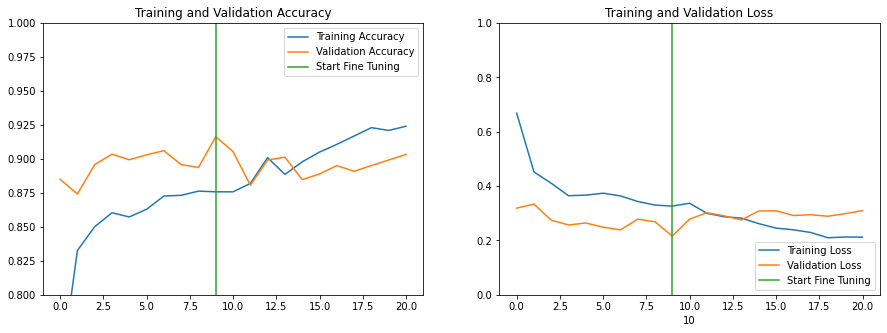

In [21]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs - 1, initial_epochs - 1],
         plt.ylim(), label = 'Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs - 1, initial_epochs - 1],
         plt.ylim(), label = 'Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

plt.xlabel(epochs)

plt.show()

In [23]:
new_data_dir = "gdrive/My Drive/animal_images"
batch_size = 32
img_height = 180
img_width = 180
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)

class_names = test_dataset.class_names
print(class_names)

Found 2434 files belonging to 3 classes.
['bear', 'horse', 'zebra']


In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test Accuracy: ', accuracy)

77/77 [==============================] - 12s 134ms/step - loss: 0.1999 - accuracy: 0.9302
